In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train_loan.csv')
train.drop('Loan_ID',axis=1,inplace=True)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
replace={'Y':1,'N':0}
train['Loan_Status']=train['Loan_Status'].map(replace)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [4]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.shape

(614, 12)

## Missing Value Analysis


In [6]:
train_na=[feature for feature in train.columns if train[feature].isnull().sum()>1]
train_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

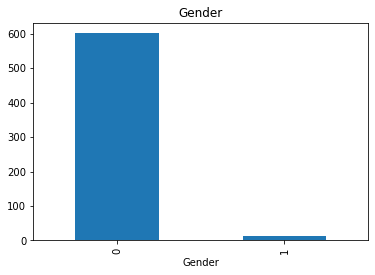

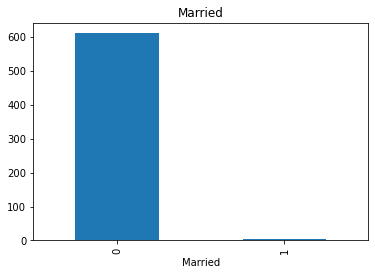

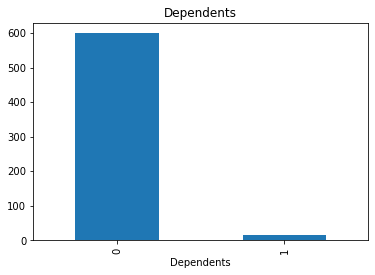

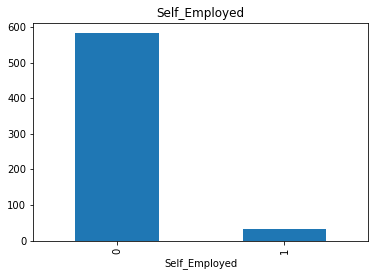

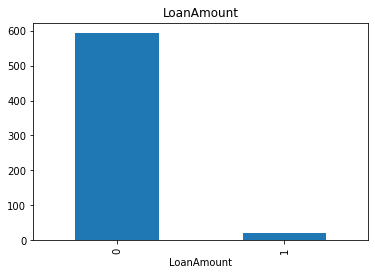

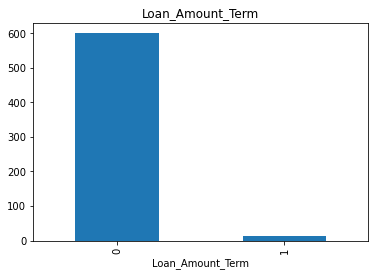

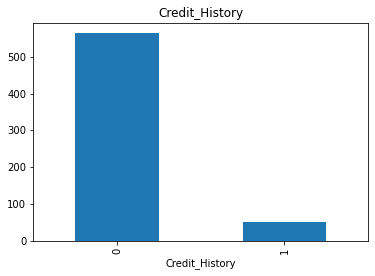

In [7]:
for feature in train_na:
    data=train.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['Loan_Status'].count().plot.bar()
    plt.title(feature)
    plt.show()

## Categorical Analysis

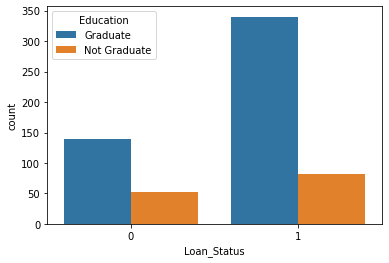

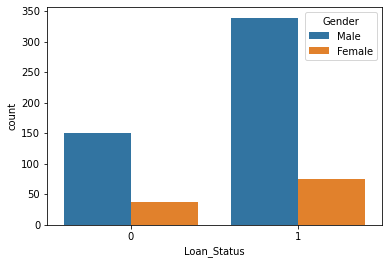

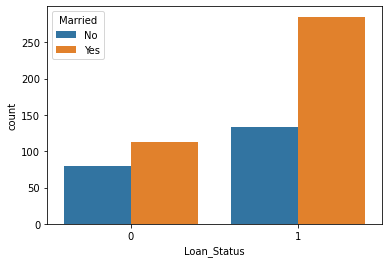

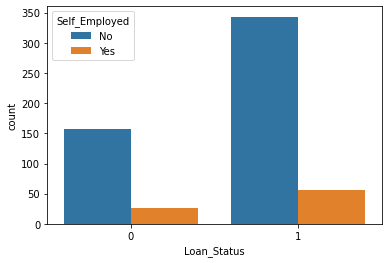

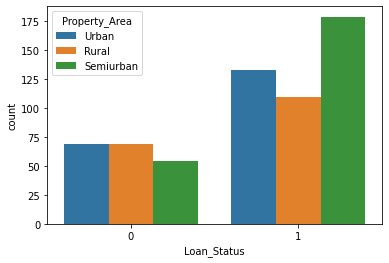

In [8]:
cat_data=['Education','Gender','Married','Self_Employed','Property_Area']
for column in cat_data:
    plt.subplot()
    sns.countplot(x='Loan_Status',hue=column ,data=train)
    plt.show()

In [9]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Numerical Data Analysis

In [10]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

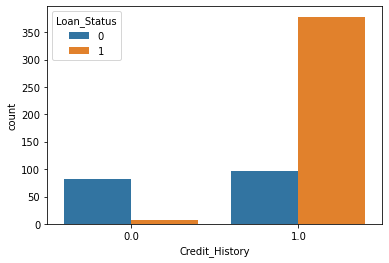

In [11]:
sns.countplot(x='Credit_History', hue='Loan_Status',data=train)

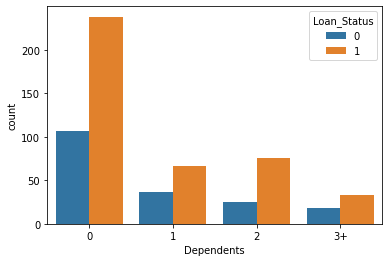

In [12]:
sns.countplot(x='Dependents', hue='Loan_Status',data=train)

## Continuous Data Analysis

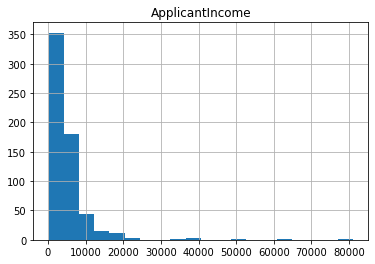

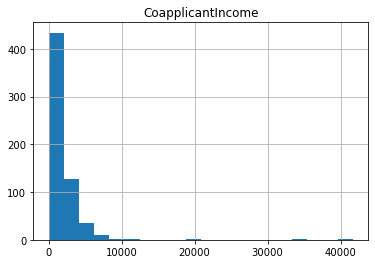

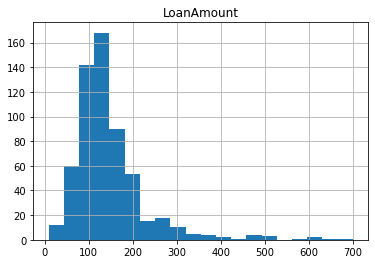

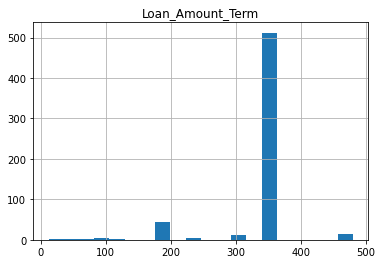

In [13]:
conti_data=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for column in conti_data:
    train[column].hist(bins=20)
    plt.title(column)
    plt.show()

# (Cant perform log normal distribution because the continuous columns contains 0 in it.)

## Missing Values

In [14]:
cat_data=pd.DataFrame()
num_data=pd.DataFrame()
for i,c in enumerate(train.dtypes):
    if c == object:
        cat_data=pd.concat([cat_data,train.iloc[:, i]],axis=1)
    else :
        num_data=pd.concat([num_data,train.iloc[:, i]],axis=1)
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [15]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [16]:
for column in num_data:
    train[column].fillna(train[column].mean(),inplace=True)

In [17]:
for column in cat_data:
    train[column].fillna(train[column].value_counts().sort_values().index[0],inplace=True)

In [18]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Engineering

In [19]:
def replace(x):
    if x=='3+':
        return 3
    return x
train['Dependents']=train['Dependents'].apply(lambda x:replace(x))

In [20]:
for feature in cat_data:
    labels_ordered=train.groupby([feature])['Loan_Status'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)
    train[feature]=train[feature].map(labels_ordered)   

{'Female': 0, 'Male': 1}
{'No': 0, 'Yes': 1}
{3: 0, '1': 1, '0': 2, '2': 3}
{'Not Graduate': 0, 'Graduate': 1}
{'No': 0, 'Yes': 1}
{'Rural': 0, 'Urban': 1, 'Semiurban': 2}


In [21]:
train.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,2,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,2,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,2,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,2,1,0,6000,0.0,141.000000,360.0,1.0,1,1
5,1,1,3,1,1,5417,4196.0,267.000000,360.0,1.0,1,1
6,1,1,2,0,0,2333,1516.0,95.000000,360.0,1.0,1,1
7,1,1,0,1,0,3036,2504.0,158.000000,360.0,0.0,2,0
8,1,1,3,1,0,4006,1526.0,168.000000,360.0,1.0,1,1
9,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,2,0


## Model Selection

In [22]:
Y=train['Loan_Status']
X=train.drop('Loan_Status',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model=RandomForestClassifier()

In [24]:
#from sklearn.model_selection import RandomizedSearchCV

#parameter = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800],
 #              'max_features': ['auto', 'sqrt'],
  #             'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  #             'min_samples_split': [2, 5, 10, 15, 100],
   #            'min_samples_leaf': [1, 2, 5, 10]}

#grid = RandomizedSearchCV(estimator=model ,param_distributions=parameter ,scoring='accuracy',cv= 10,n_jobs=-1)
#grid.fit(X_train,Y_train)
#grid.predict(X_test)
#grid.best_score_

In [25]:
#grid.best_params_

In [26]:
model=RandomForestClassifier(n_estimators=1800,min_samples_split= 15,min_samples_leaf=10,max_features='auto',
                             max_depth=10)
model.fit(X_train,Y_train)
ypred=model.predict(X_test)

In [27]:
accuracy_score(ypred,Y_test)

0.8292682926829268

In [28]:
confusion_matrix(ypred,Y_test)

array([[14,  2],
       [19, 88]], dtype=int64)

In [44]:
np.array(Y_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [42]:
X_test.head(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,2,1,1,7085,0.0,84.0,360.0,1.0,2
52,0,0,2,1,0,4230,0.0,112.0,360.0,1.0,2
536,1,1,2,1,0,6133,3906.0,324.0,360.0,1.0,1
469,1,1,2,1,0,4333,2451.0,110.0,360.0,1.0,1
55,1,1,3,1,0,2708,1167.0,97.0,360.0,1.0,2
62,1,1,2,0,1,2609,3449.0,165.0,180.0,0.0,0
539,1,1,0,1,0,6417,0.0,157.0,180.0,1.0,0


## Test Data

In [29]:
test=pd.read_csv('test_loan.csv')
test.drop('Loan_ID',axis=1,inplace=True)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [30]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
cat_data = test.select_dtypes(include=['object']).copy()
num_data = test.select_dtypes(exclude=['object']).copy()

cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban


In [32]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,NaN
4,3276,0,78.0,360.0,1.0


In [33]:
def replace(x):
    if x=='3+':
        return 3
    return x
test['Dependents']=test['Dependents'].apply(lambda x:replace(x))

In [34]:
for column in num_data:
    test[column].fillna(test[column].mean(),inplace=True)

In [35]:
for column in cat_data:
    test[column].fillna(test[column].value_counts().sort_values().index[0],inplace=True)

In [36]:
for feature in cat_data.columns:
    labels_ordered=test[feature].value_counts().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test[feature]=test[feature].map(labels_ordered)   
    

In [37]:
prediction=model.predict(test)
prediction=pd.DataFrame(prediction,columns=['Loan_Status'])

In [38]:
prediction['Loan_Status'].value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64